### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

## КП №4 

**Радченко Олег** _БС-81_

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sts

In [4]:
df = pd.DataFrame({
    'var1_normal': np.random.normal(loc=13.37, scale=1, size=20),
    'var2_normal': np.random.normal(loc=1, scale=13.37, size=20),
    'var3_normal': np.random.normal(loc=22, scale=8, size=20),
    'var4_gumbel': np.random.gumbel(loc=13.37, scale=1, size=20),
    'var5_gumbel': np.random.gumbel(loc=1, scale=13.37, size=20),
    'var6_gumbel': np.random.gumbel(loc=22, scale=8, size=20)
})

df

,var1_normal,var2_normal,var3_normal,var4_gumbel,var5_gumbel,var6_gumbel
0,14.019056,-14.465560,17.724314,14.367996,25.847091,19.409388
1,13.774592,0.772360,21.216386,15.585811,21.365752,30.669060
2,11.875270,-0.350496,30.457916,16.934420,21.958754,15.466050
3,12.065739,8.943590,21.670372,13.032882,-1.091981,37.020509
4,12.433639,25.452137,10.884719,13.896745,-2.646836,11.312537
5,14.377298,18.927404,35.368414,13.545188,29.136539,20.255793
6,15.406194,-0.093062,28.390575,13.978115,5.423126,36.304922
7,14.006639,-16.338057,19.640513,13.363778,-10.295235,39.309642
8,12.677508,14.875262,14.773631,12.345679,2.242236,15.916128
9,14.180446,0.138310,26.065574,12.882446,12.334721,37.061994


2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку:
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [7]:
# Sort Sample Values By Ascending

df = df.apply(lambda x: x.sort_values().values)
df

,var1_normal,var2_normal,var3_normal,var4_gumbel,var5_gumbel,var6_gumbel
0,11.720740,-19.942082,4.165130,12.345679,-10.295235,11.312537
1,11.875270,-17.265946,10.884719,12.392069,-8.712595,15.466050
2,12.065739,-16.338057,14.773631,12.870273,-6.222979,15.916128
3,12.098750,-14.465560,16.526660,12.882446,-3.456362,17.190155
4,12.433639,-10.051144,17.724314,13.032882,-2.646836,18.286209
5,12.490060,-7.916376,18.007253,13.069893,-1.091981,18.345299
6,12.677508,-6.951341,19.640513,13.363778,2.242236,19.409388
7,12.715450,-0.350496,21.216386,13.392233,5.423126,20.255793
8,13.165205,-0.093062,21.670372,13.545188,5.674325,22.087903
9,13.284419,0.138310,23.066714,13.778697,12.334721,25.724553


![title](W.jpg)

In [13]:
# (a'y)^2
# n = 20;

arrSize = df.shape[0]

# table values
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def calculateB(samples):
    return sum([a[i]*(samples[(arrSize-1)-i]-samples[i]) for i in range(arrSize//2)])

b= {key: calculateB(df[key]) for key in df}

In [10]:
#  S^2

def calculateSquaredS(samples, meanValue):
    return sum([ pow(samples[i]-meanValue, 2) for i in range(arrSize)]) 

meanValues = {key: np.mean(df[key]) for key in df}
squaredS = {key: calculateSquaredS(df[key], meanValues[key])
                 for key in df}

In [20]:
# W

def calculateW(b, squaredS):
    return pow(b,2)/squaredS

WCalculated = {key: calculateW(b[key], squaredS[key]) for key in df}

WTheoretical = sts.shapiro(df['var2_normal'])
#WCalculated
WTheoretical

(0.9556618928909302, 0.4612151086330414)

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

In [21]:
titles = ["Variable", "Statistics", "Distribution"]
resultDf = pd.DataFrame(columns = titles)
resultDf

,Variable,Statistics,Distribution


4. Занести в стовпчик Variable назви змінних.

In [22]:
resultDf["Variable"] = df.keys()
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,NaN
1,var2_normal,NaN,NaN
2,var3_normal,NaN,NaN
3,var4_gumbel,NaN,NaN
4,var5_gumbel,NaN,NaN
5,var6_gumbel,NaN,NaN


5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

In [24]:
resultDf["Distribution"] = [
                               ('normal ' if 'normal' in key else 'non-normal ')
                               +
                               str(WCalculated[key])
                                   for key in resultDf["Variable"]
                           ]
resultDf

,Variable,Statistics,Distribution
0,var1_normal,NaN,normal 0.9586715344868789
1,var2_normal,NaN,normal 0.9558048554835198
2,var3_normal,NaN,normal 0.964034974943632
3,var4_gumbel,NaN,non-normal 0.8936865981777627
4,var5_gumbel,NaN,non-normal 0.9660353948320939
5,var6_gumbel,NaN,non-normal 0.9397845191317418


6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



In [27]:
newArrSize = resultDf.shape[0]

for i in range (newArrSize):
    key = resultDf["Variable"][i]
    if 'normal' in key:
        resultDf["Statistics"][i] = f'{df[key].mean()} [{df[key].std()}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,13.343450761311578 [1.0460217628173283],normal 0.9586715344868789
1,var2_normal,2.2290466768759836 [14.149665310793655],normal 0.9558048554835198
2,var3_normal,22.83272918911483 [7.718636720222158],normal 0.964034974943632
3,var4_gumbel,NaN,non-normal 0.8936865981777627
4,var5_gumbel,NaN,non-normal 0.9660353948320939
5,var6_gumbel,NaN,non-normal 0.9397845191317418


7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [29]:
for i in range (newArrSize):
    key = resultDf["Variable"][i]
    if 'normal' not in key:
        resultDf["Statistics"][i] = f'{df[key].median()} [{df[key].quantile(0.25)}; {df[key].quantile(0.75)}]'

resultDf

,Variable,Statistics,Distribution
0,var1_normal,13.343450761311578 [1.0460217628173283],normal 0.9586715344868789
1,var2_normal,2.2290466768759836 [14.149665310793655],normal 0.9558048554835198
2,var3_normal,22.83272918911483 [7.718636720222158],normal 0.964034974943632
3,var4_gumbel,13.837721279854136 [13.060640170195665; 14.453...,non-normal 0.8936865981777627
4,var5_gumbel,12.557452096692078 [-1.4806947218654214; 21.51...,non-normal 0.9660353948320939
5,var6_gumbel,26.42788376712921 [18.33052646776558; 33.20355...,non-normal 0.9397845191317418


8. Зберегти таблицю в пдф форматі

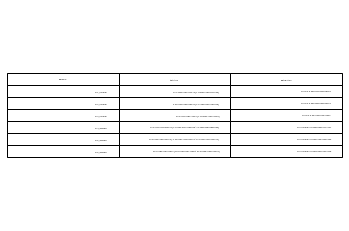

In [35]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

fig = plt.figure()

ax=fig.add_subplot(111)

cell_text = []
for row in range(len(resultDf)):
    cell_text.append(resultDf.iloc[row])

ax.table(cellText=cell_text, colLabels=resultDf.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
pdf.savefig(fig)
pdf.close()